In [2]:
from IPython.display import Image
from IPython.core.display import HTML
import numpy as np
import random
from scipy.integrate import RK45
import matplotlib.pyplot as plt

In [5]:
# Podpunkt (b) model SIS

def SIS(t, y, params):
    beta, gamma, N = params
    S0, I0 = y
    S1 = -beta * I0 * S0 / N + gamma * I0
    I1 = beta * I0 * S0 / N - gamma * I0
    return [S1, I1]

# parametry
beta = .5
gamma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)

T_ode = np.zeros(steps)
Y = np.zeros((steps, 2))
Y[0, :] = [N - 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SIS(t, y, [beta, gamma, N]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
I_Dopri = Y[:, 1]

# parametry
beta = .5
gamma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(N)
s_i = lambda t, s, i:  -beta * i * s / N + gamma * i
i_i = lambda t, s, i:  beta * i * s / N - gamma * i

S = np.zeros(N)
I = np.zeros(N)
S[0] = N-1
I[0] = 1
N_arr = np.linspace(1,1000,1000)

for x in range(N-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x])

S_dt1 = S_Dopri - S[:100]
I_dt1 = I_Dopri - I[:100]

SRMS_dt1 = np.power(np.sum(np.power(S_dt1,2)/N),0.5)
print(SRMS_dt1)

15.586208549845285


In [7]:
beta = .5
gamma = .1
N = 500
T = 50
dt = .1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
t = np.arange(0, 1 + dt, dt)
steps = int(T / dt)
T_ode = np.arange(0, steps, 1)
s_i = lambda t, s, i:  -beta * i * s / N + gamma * i
i_i = lambda t, s, i:  beta * i * s / N - gamma * i

S = np.zeros(steps)
I = np.zeros(steps)
S[0] = N-1
I[0] = 1
N_arr = np.linspace(1,1000,1000)

for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x])

SI_euler_s = S
SI_euler_i = I

Y = np.zeros((steps, 2))
Y[0, :] = [N - 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SIS(t, y, [beta, gamma, N]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
I_Dopri = Y[:, 1]

S_dt01 = S_Dopri - SI_euler_s
I_dt01 = I_Dopri - SI_euler_i

SRMS_dt01 = np.power(np.sum(np.power(S_dt01,2)/N),0.5)

print([SRMS_dt01])

[3.1586173679804945]


In [11]:
beta = .5
gamma = .1
N = 500
T = 50
dt = .01 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
t = np.arange(0, 1 + dt, dt)
steps = int(T / dt)
T_ode = np.arange(0, steps, 1)
s_i = lambda t, s, i:  -beta * i * s / N + gamma * i
i_i = lambda t, s, i:  beta * i * s / N - gamma * i

S = np.zeros(steps)
I = np.zeros(steps)
S[0] = N-1
I[0] = 1
N_arr = np.linspace(1,1000,1000)

for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x])

SI_euler_s = S
SI_euler_i = I

Y = np.zeros((steps, 2))
Y[0, :] = [N - 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SIS(t, y, [beta, gamma, N]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
I_Dopri = Y[:, 1]

S_dt001 = S_Dopri - SI_euler_s
I_dt001 = I_Dopri - SI_euler_i

SRMS_dt001 = np.power(np.sum(np.power(S_dt001,2)/N),0.5)

print([SRMS_dt001])

SRMS_dt001 = np.power(np.sum(np.power(I_dt001,2)/N),0.5)

print([SRMS_dt001])

[1.003002626182771]
[1.0030026261824214]


In [10]:
beta = .5
gamma = .1
N = 500
T = 50
dt = .001 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
t = np.arange(0, 1 + dt, dt)
steps = int(T / dt)
T_ode = np.arange(0, steps, 1)
s_i = lambda t, s, i:  -beta * i * s / N + gamma * i
i_i = lambda t, s, i:  beta * i * s / N - gamma * i

S = np.zeros(steps)
I = np.zeros(steps)
S[0] = N-1
I[0] = 1
N_arr = np.linspace(1,1000,1000)

for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x])

SI_euler_s = S
SI_euler_i = I

Y = np.zeros((steps, 2))
Y[0, :] = [N - 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SIS(t, y, [beta, gamma, N]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
I_Dopri = Y[:, 1]

S_dt001 = S_Dopri - SI_euler_s
I_dt001 = I_Dopri - SI_euler_i

SRMS_dt001 = np.power(np.sum(np.power(S_dt001,2)/N),0.5)

IRMS_dt001 = np.power(np.sum(np.power(I_dt001,2)/N),0.5)

print([SRMS_dt001])
print([IRMS_dt001])

[0.31730841180452574]
[0.31730841180274466]


In [12]:
# SIRS
def SIRS(t, y, params):
    beta, gamma, N, eta = params
    S0, I0, R0 = y
    S1 = -beta * I0 * S0 / N + eta * R0
    I1 = beta * I0 * S0 / N - gamma * I0
    R1 = gamma * I0 - eta * R0
    return [S1, I1, R1]

# parametry
beta = .5
gamma = .1
eta = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 3))
Y[0, :] = [N - 1, 1, 0] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SIRS(t, y, [beta, gamma, N, eta]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
I_Dopri = Y[:, 1]
R_Dopri = Y[:, 2] 

# parametry
beta = .5
eta = .1
gamma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.arange(0, steps, 1)
s_i = lambda t, s, i, r: -beta * i * s / N + eta * r
i_i = lambda t, s, i, r: beta * i * s / N - gamma * i
r_i = lambda t, s, i, r: gamma * i - eta * r

S = np.zeros(steps)
I = np.zeros(steps)
R = np.zeros(steps)
S[0] = N-1
I[0] = 1
R[0] = 0
N_arr = np.linspace(1,1000,1000)

for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x])

SI_euler_s = S
SI_euler_i = I

S_dt001 = S_Dopri - SI_euler_s
I_dt001 = I_Dopri - SI_euler_i

SRMS_dt001 = np.power(np.sum(np.power(S_dt001,2)/N),0.5)

IRMS_dt001 = np.power(np.sum(np.power(I_dt001,2)/N),0.5)

print([SRMS_dt001])
print([IRMS_dt001])

[16.482416947637226]
[11.426159262834636]


In [15]:
# SIRS
def SIRS(t, y, params):
    beta, gamma, N, eta = params
    S0, I0, R0 = y
    S1 = -beta * I0 * S0 / N + eta * R0
    I1 = beta * I0 * S0 / N - gamma * I0
    R1 = gamma * I0 - eta * R0
    return [S1, I1, R1]

# parametry
beta = .5
gamma = .1
eta = .1
N = 1000
T = 100
dt = .1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 3))
Y[0, :] = [N - 1, 1, 0] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SIRS(t, y, [beta, gamma, N, eta]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
I_Dopri = Y[:, 1]
R_Dopri = Y[:, 2] 

# parametry
beta = .5
eta = .1
gamma = .1
N = 1000
T = 100
dt = .1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.arange(0, steps, 1)
s_i = lambda t, s, i, r: -beta * i * s / N + eta * r
i_i = lambda t, s, i, r: beta * i * s / N - gamma * i
r_i = lambda t, s, i, r: gamma * i - eta * r

S = np.zeros(steps)
I = np.zeros(steps)
R = np.zeros(steps)
S[0] = N-1
I[0] = 1
R[0] = 0
N_arr = np.linspace(1,1000,1000)

for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x])

SI_euler_s = S
SI_euler_i = I

S_dt001 = S_Dopri - SI_euler_s
I_dt001 = I_Dopri - SI_euler_i

SRMS_dt001 = np.power(np.sum(np.power(S_dt001,2)/N),0.5)

IRMS_dt001 = np.power(np.sum(np.power(I_dt001,2)/N),0.5)

print([SRMS_dt001])
print([IRMS_dt001])

[5.423060998905727]
[3.751623465694506]


In [16]:
# SIRS
def SIRS(t, y, params):
    beta, gamma, N, eta = params
    S0, I0, R0 = y
    S1 = -beta * I0 * S0 / N + eta * R0
    I1 = beta * I0 * S0 / N - gamma * I0
    R1 = gamma * I0 - eta * R0
    return [S1, I1, R1]

# parametry
beta = .5
gamma = .1
eta = .1
N = 1000
T = 100
dt = .01 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 3))
Y[0, :] = [N - 1, 1, 0] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SIRS(t, y, [beta, gamma, N, eta]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
I_Dopri = Y[:, 1]
R_Dopri = Y[:, 2] 

# parametry
beta = .5
eta = .1
gamma = .1
N = 1000
T = 100
dt = .01 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.arange(0, steps, 1)
s_i = lambda t, s, i, r: -beta * i * s / N + eta * r
i_i = lambda t, s, i, r: beta * i * s / N - gamma * i
r_i = lambda t, s, i, r: gamma * i - eta * r

S = np.zeros(steps)
I = np.zeros(steps)
R = np.zeros(steps)
S[0] = N-1
I[0] = 1
R[0] = 0
N_arr = np.linspace(1,1000,1000)

for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x])

SI_euler_s = S
SI_euler_i = I

S_dt001 = S_Dopri - SI_euler_s
I_dt001 = I_Dopri - SI_euler_i

SRMS_dt001 = np.power(np.sum(np.power(S_dt001,2)/N),0.5)

IRMS_dt001 = np.power(np.sum(np.power(I_dt001,2)/N),0.5)

print([SRMS_dt001])
print([IRMS_dt001])

[1.720915128168067]
[1.1898161141602626]


In [17]:
# SIRS
def SIRS(t, y, params):
    beta, gamma, N, eta = params
    S0, I0, R0 = y
    S1 = -beta * I0 * S0 / N + eta * R0
    I1 = beta * I0 * S0 / N - gamma * I0
    R1 = gamma * I0 - eta * R0
    return [S1, I1, R1]

# parametry
beta = .5
gamma = .1
eta = .1
N = 1000
T = 100
dt = .001 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 3))
Y[0, :] = [N - 1, 1, 0] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SIRS(t, y, [beta, gamma, N, eta]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
I_Dopri = Y[:, 1]
R_Dopri = Y[:, 2] 

# parametry
beta = .5
eta = .1
gamma = .1
N = 1000
T = 100
dt = .001 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.arange(0, steps, 1)
s_i = lambda t, s, i, r: -beta * i * s / N + eta * r
i_i = lambda t, s, i, r: beta * i * s / N - gamma * i
r_i = lambda t, s, i, r: gamma * i - eta * r

S = np.zeros(steps)
I = np.zeros(steps)
R = np.zeros(steps)
S[0] = N-1
I[0] = 1
R[0] = 0
N_arr = np.linspace(1,1000,1000)

for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x])

SI_euler_s = S
SI_euler_i = I

S_dt001 = S_Dopri - SI_euler_s
I_dt001 = I_Dopri - SI_euler_i

SRMS_dt001 = np.power(np.sum(np.power(S_dt001,2)/N),0.5)

IRMS_dt001 = np.power(np.sum(np.power(I_dt001,2)/N),0.5)

print([SRMS_dt001])
print([IRMS_dt001])

[0.5443885424087578]
[0.376358886217575]


In [4]:
# SEIR

def SEIR(t, y, params):
    beta, gamma, N, sigma = params
    S0, I0, R0, E0 = y
    S1 = -beta * I0 * S0 / N
    E1 = beta * I0 * S0 / N - sigma * E0
    I1 = sigma * E0 - gamma * I0
    R1 = gamma * I0
    return [S1, I1, R1, E1]

# parametry
beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 4))
Y[0, :] = [N-1, 1, 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SEIR(t, y, [beta, gamma, N, sigma]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
I_Dopri = Y[:, 1]
R_Dopri = Y[:, 2]
E_Dopri = Y[:, 3]


# parametry
beta = .5
eta = .1
gamma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.arange(0, steps, 1)
s_i = lambda t, s, i, r, e: -beta * i * s / N
i_i = lambda t, s, i, r, e: sigma * e - gamma * i
r_i = lambda t, s, i, r, e: gamma * i
e_i = lambda t, s, i, r, e: beta * i * s / N - sigma * e

S = np.zeros(steps)
E = np.zeros(steps)
I = np.zeros(steps)
R = np.zeros(steps)
S[0] = N-2
E[0] = 1
I[0] = 1
R[0] = 0
N_arr = np.linspace(1,1000,1000)

for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x], E[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x], E[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x], E[x])
    E[x+1] = E[x] + dt*e_i(T_ode[x], S[x], I[x], R[x], E[x])

SI_euler_s = S
SI_euler_i = I

S_dt001 = S_Dopri - SI_euler_s
I_dt001 = I_Dopri - SI_euler_i

SRMS_dt001 = np.power(np.sum(np.power(S_dt001,2)/N),0.5)

IRMS_dt001 = np.power(np.sum(np.power(I_dt001,2)/N),0.5)

print([SRMS_dt001])
print([IRMS_dt001])

[9.777506287355852]
[3.5741351423622545]


In [19]:
def SEIR(t, y, params):
    beta, gamma, N, sigma = params
    S0, I0, R0, E0 = y
    S1 = -beta * I0 * S0 / N
    E1 = beta * I0 * S0 / N - sigma * E0
    I1 = sigma * E0 - gamma * I0
    R1 = gamma * I0
    return [S1, I1, R1, E1]

# parametry
beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
dt = .1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 4))
Y[0, :] = [N-1, 1, 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SEIR(t, y, [beta, gamma, N, sigma]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
I_Dopri = Y[:, 1]
R_Dopri = Y[:, 2]
E_Dopri = Y[:, 3]


# parametry
beta = .5
eta = .1
gamma = .1
N = 1000
T = 100
dt = .1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.arange(0, steps, 1)
s_i = lambda t, s, i, r, e: -beta * i * s / N
i_i = lambda t, s, i, r, e: sigma * e - gamma * i
r_i = lambda t, s, i, r, e: gamma * i
e_i = lambda t, s, i, r, e: beta * i * s / N - sigma * e

S = np.zeros(steps)
E = np.zeros(steps)
I = np.zeros(steps)
R = np.zeros(steps)
S[0] = N-2
E[0] = 1
I[0] = 1
R[0] = 0
N_arr = np.linspace(1,1000,1000)

for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x], E[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x], E[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x], E[x])
    E[x+1] = E[x] + dt*e_i(T_ode[x], S[x], I[x], R[x], E[x])

SI_euler_s = S
SI_euler_i = I

S_dt001 = S_Dopri - SI_euler_s
I_dt001 = I_Dopri - SI_euler_i

SRMS_dt001 = np.power(np.sum(np.power(S_dt001,2)/N),0.5)

IRMS_dt001 = np.power(np.sum(np.power(I_dt001,2)/N),0.5)

print([SRMS_dt001])
print([IRMS_dt001])

[3.356759209243557]
[1.2571923049481162]


In [20]:
def SEIR(t, y, params):
    beta, gamma, N, sigma = params
    S0, I0, R0, E0 = y
    S1 = -beta * I0 * S0 / N
    E1 = beta * I0 * S0 / N - sigma * E0
    I1 = sigma * E0 - gamma * I0
    R1 = gamma * I0
    return [S1, I1, R1, E1]

# parametry
beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
dt = .01 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 4))
Y[0, :] = [N-1, 1, 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SEIR(t, y, [beta, gamma, N, sigma]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
I_Dopri = Y[:, 1]
R_Dopri = Y[:, 2]
E_Dopri = Y[:, 3]


# parametry
beta = .5
eta = .1
gamma = .1
N = 1000
T = 100
dt = .01 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.arange(0, steps, 1)
s_i = lambda t, s, i, r, e: -beta * i * s / N
i_i = lambda t, s, i, r, e: sigma * e - gamma * i
r_i = lambda t, s, i, r, e: gamma * i
e_i = lambda t, s, i, r, e: beta * i * s / N - sigma * e

S = np.zeros(steps)
E = np.zeros(steps)
I = np.zeros(steps)
R = np.zeros(steps)
S[0] = N-2
E[0] = 1
I[0] = 1
R[0] = 0
N_arr = np.linspace(1,1000,1000)

for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x], E[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x], E[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x], E[x])
    E[x+1] = E[x] + dt*e_i(T_ode[x], S[x], I[x], R[x], E[x])

SI_euler_s = S
SI_euler_i = I

S_dt001 = S_Dopri - SI_euler_s
I_dt001 = I_Dopri - SI_euler_i

SRMS_dt001 = np.power(np.sum(np.power(S_dt001,2)/N),0.5)

IRMS_dt001 = np.power(np.sum(np.power(I_dt001,2)/N),0.5)

print([SRMS_dt001])
print([IRMS_dt001])

[2.495829158397681]
[0.9975607855467025]


In [5]:
def SEIR(t, y, params):
    beta, gamma, N, sigma = params
    S0, I0, R0, E0 = y
    S1 = -beta * I0 * S0 / N
    E1 = beta * I0 * S0 / N - sigma * E0
    I1 = sigma * E0 - gamma * I0
    R1 = gamma * I0
    return [S1, I1, R1, E1]

# parametry
beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
dt = .001 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 4))
Y[0, :] = [N-1, 1, 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SEIR(t, y, [beta, gamma, N, sigma]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
I_Dopri = Y[:, 1]
R_Dopri = Y[:, 2]
E_Dopri = Y[:, 3]


# parametry
beta = .5
eta = .1
gamma = .1
N = 1000
T = 100
dt = .001 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.arange(0, steps, 1)
s_i = lambda t, s, i, r, e: -beta * i * s / N
i_i = lambda t, s, i, r, e: sigma * e - gamma * i
r_i = lambda t, s, i, r, e: gamma * i
e_i = lambda t, s, i, r, e: beta * i * s / N - sigma * e

S = np.zeros(steps)
E = np.zeros(steps)
I = np.zeros(steps)
R = np.zeros(steps)
S[0] = N-2
E[0] = 1
I[0] = 1
R[0] = 0
N_arr = np.linspace(1,1000,1000)

for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x], E[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x], E[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x], E[x])
    E[x+1] = E[x] + dt*e_i(T_ode[x], S[x], I[x], R[x], E[x])

SI_euler_s = S
SI_euler_i = I
SI_euler_e = E
SI_euler_r = R

S_dt001 = S_Dopri - SI_euler_s
I_dt001 = I_Dopri - SI_euler_i

SRMS_dt001 = np.power(np.sum(np.power(S_dt001,2)/len(S_dt001)),0.5)

IRMS_dt001 = np.power(np.sum(np.power(I_dt001,2)/N),0.5)

print([SRMS_dt001])
print([IRMS_dt001])

[0.6446658954350013]
[2.4683796552325874]


C:\Users\pierw\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


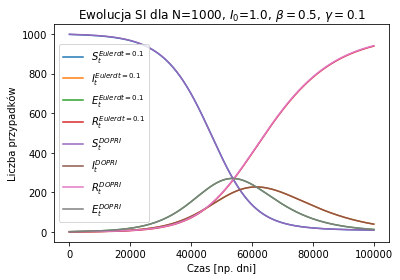

In [27]:
N_arr = np.linspace(1,100000,100000)
plt.plot(N_arr, SI_euler_s, label=r'$S_t^{Euler dt = 0.001}$')
plt.plot(N_arr, SI_euler_i, label=r'$I_t^{Euler dt = 0.001}$')
plt.plot(N_arr, SI_euler_e, label=r'$E_t^{Euler dt = 0.001}$')
plt.plot(N_arr, SI_euler_r, label=r'$R_t^{Euler dt = 0.001}$')
plt.plot(N_arr, S_Dopri, label=r'$S_t^{DOPRI}$')
plt.plot(N_arr, I_Dopri, label=r'$I_t^{DOPRI}$')
plt.plot(N_arr, R_Dopri, label=r'$R_t^{DOPRI}$')
plt.plot(N_arr, E_Dopri, label=r'$E_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.title(f'Ewolucja SI dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$')
plt.legend()
# plt.savefig('SI_Dopri.png', dpi=300)
plt.show()

In [29]:
# Podpunkt (e) model SEIRS dla metody DOPRI
def SEIRS(t, y, params):
    beta, gamma, N, sigma, eta = params
    S0, I0, R0, E0 = y
    S1 = -beta * I0 * S0 / N  + eta * R0
    E1 = beta * I0 * S0 / N - sigma * E0
    I1 = sigma * E0 - gamma * I0
    R1 = gamma * I0  - eta * R0
    return [S1, I1, R1, E1]

# parametry
beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 4))
Y[0, :] = [N - 3, 1, 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SEIRS(t, y, [beta, gamma, N, sigma, eta]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
E_Dopri = Y[:, 1]
I_Dopri = Y[:, 2]
R_Dopri = Y[:, 3] 

beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
s_i = lambda t, s, i, r, e: -beta * i * s / N + eta * r
i_i = lambda t, s, i, r, e: sigma * e - gamma * i
r_i = lambda t, s, i, r, e: gamma * i - eta * r
e_i = lambda t, s, i, r, e: beta * i * s / N - sigma * e
S = np.zeros(steps)
E = np.zeros(steps)
I = np.zeros(steps)
R = np.zeros(steps)
T_ode = np.zeros(steps)
S[0] = N-2
E[0] = 1
I[0] = 1
R[0] = 0
N_arr = np.linspace(1,1000,1000)

dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x], E[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x], E[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x], E[x])
    E[x+1] = E[x] + dt*e_i(T_ode[x], S[x], I[x], R[x], E[x])

SI_euler_s = S
SI_euler_i = I
SI_euler_e = E
SI_euler_r = R

S_dt001 = S_Dopri - SI_euler_s
I_dt001 = I_Dopri - SI_euler_i

SRMS_dt001 = np.power(np.sum(np.power(S_dt001,2)/N),0.5)

IRMS_dt001 = np.power(np.sum(np.power(I_dt001,2)/N),0.5)

print([SRMS_dt001])
print([IRMS_dt001])

[8.716182755703914]
[10.465272054610093]


In [30]:
def SEIRS(t, y, params):
    beta, gamma, N, sigma, eta = params
    S0, I0, R0, E0 = y
    S1 = -beta * I0 * S0 / N  + eta * R0
    E1 = beta * I0 * S0 / N - sigma * E0
    I1 = sigma * E0 - gamma * I0
    R1 = gamma * I0  - eta * R0
    return [S1, I1, R1, E1]

# parametry
beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
dt = .1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 4))
Y[0, :] = [N - 3, 1, 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SEIRS(t, y, [beta, gamma, N, sigma, eta]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
E_Dopri = Y[:, 1]
I_Dopri = Y[:, 2]
R_Dopri = Y[:, 3] 

beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
s_i = lambda t, s, i, r, e: -beta * i * s / N + eta * r
i_i = lambda t, s, i, r, e: sigma * e - gamma * i
r_i = lambda t, s, i, r, e: gamma * i - eta * r
e_i = lambda t, s, i, r, e: beta * i * s / N - sigma * e
S = np.zeros(steps)
E = np.zeros(steps)
I = np.zeros(steps)
R = np.zeros(steps)
T_ode = np.zeros(steps)
S[0] = N-2
E[0] = 1
I[0] = 1
R[0] = 0
N_arr = np.linspace(1,1000,1000)

dt = .1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x], E[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x], E[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x], E[x])
    E[x+1] = E[x] + dt*e_i(T_ode[x], S[x], I[x], R[x], E[x])

SI_euler_s = S
SI_euler_i = I
SI_euler_e = E
SI_euler_r = R

S_dt001 = S_Dopri - SI_euler_s
I_dt001 = I_Dopri - SI_euler_i

SRMS_dt001 = np.power(np.sum(np.power(S_dt001,2)/N),0.5)

IRMS_dt001 = np.power(np.sum(np.power(I_dt001,2)/N),0.5)

print([SRMS_dt001])
print([IRMS_dt001])

[2.6918369453420716]
[40.1411501732851]


In [31]:
def SEIRS(t, y, params):
    beta, gamma, N, sigma, eta = params
    S0, I0, R0, E0 = y
    S1 = -beta * I0 * S0 / N  + eta * R0
    E1 = beta * I0 * S0 / N - sigma * E0
    I1 = sigma * E0 - gamma * I0
    R1 = gamma * I0  - eta * R0
    return [S1, I1, R1, E1]

# parametry
beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
dt = .01 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 4))
Y[0, :] = [N - 3, 1, 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SEIRS(t, y, [beta, gamma, N, sigma, eta]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
E_Dopri = Y[:, 1]
I_Dopri = Y[:, 2]
R_Dopri = Y[:, 3] 

beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
s_i = lambda t, s, i, r, e: -beta * i * s / N + eta * r
i_i = lambda t, s, i, r, e: sigma * e - gamma * i
r_i = lambda t, s, i, r, e: gamma * i - eta * r
e_i = lambda t, s, i, r, e: beta * i * s / N - sigma * e
S = np.zeros(steps)
E = np.zeros(steps)
I = np.zeros(steps)
R = np.zeros(steps)
T_ode = np.zeros(steps)
S[0] = N-2
E[0] = 1
I[0] = 1
R[0] = 0
N_arr = np.linspace(1,1000,1000)

dt = .01 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x], E[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x], E[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x], E[x])
    E[x+1] = E[x] + dt*e_i(T_ode[x], S[x], I[x], R[x], E[x])

SI_euler_s = S
SI_euler_i = I
SI_euler_e = E
SI_euler_r = R

S_dt001 = S_Dopri - SI_euler_s
I_dt001 = I_Dopri - SI_euler_i

SRMS_dt001 = np.power(np.sum(np.power(S_dt001,2)/N),0.5)

IRMS_dt001 = np.power(np.sum(np.power(I_dt001,2)/N),0.5)

print([SRMS_dt001])
print([IRMS_dt001])

[0.8715153539717325]
[129.2243658751469]


In [32]:
def SEIRS(t, y, params):
    beta, gamma, N, sigma, eta = params
    S0, I0, R0, E0 = y
    S1 = -beta * I0 * S0 / N  + eta * R0
    E1 = beta * I0 * S0 / N - sigma * E0
    I1 = sigma * E0 - gamma * I0
    R1 = gamma * I0  - eta * R0
    return [S1, I1, R1, E1]

# parametry
beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
dt = .001 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 4))
Y[0, :] = [N - 3, 1, 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SEIRS(t, y, [beta, gamma, N, sigma, eta]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S_Dopri = Y[:, 0]
E_Dopri = Y[:, 1]
I_Dopri = Y[:, 2]
R_Dopri = Y[:, 3] 

beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
s_i = lambda t, s, i, r, e: -beta * i * s / N + eta * r
i_i = lambda t, s, i, r, e: sigma * e - gamma * i
r_i = lambda t, s, i, r, e: gamma * i - eta * r
e_i = lambda t, s, i, r, e: beta * i * s / N - sigma * e
S = np.zeros(steps)
E = np.zeros(steps)
I = np.zeros(steps)
R = np.zeros(steps)
T_ode = np.zeros(steps)
S[0] = N-2
E[0] = 1
I[0] = 1
R[0] = 0
N_arr = np.linspace(1,1000,1000)

dt = .001 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
for x in range(0,len(T_ode)-1):
    S[x+1] = S[x] + dt*s_i(T_ode[x], S[x], I[x], R[x], E[x])
    I[x+1] = I[x] + dt*i_i(T_ode[x], S[x], I[x], R[x], E[x])
    R[x+1] = R[x] + dt*r_i(T_ode[x], S[x], I[x], R[x], E[x])
    E[x+1] = E[x] + dt*e_i(T_ode[x], S[x], I[x], R[x], E[x])

SI_euler_s = S
SI_euler_i = I
SI_euler_e = E
SI_euler_r = R

S_dt001 = S_Dopri - SI_euler_s
I_dt001 = I_Dopri - SI_euler_i

SRMS_dt001 = np.power(np.sum(np.power(S_dt001,2)/N),0.5)

IRMS_dt001 = np.power(np.sum(np.power(I_dt001,2)/N),0.5)

print([SRMS_dt001])
print([IRMS_dt001])

[2.3924784470348577]
[409.36796787784687]
